<a href="https://colab.research.google.com/github/cirengceringe/data/blob/dataanalyst/Copy_of_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Farah Trijayanti
- **Email:** leesunsheng11@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Wilayah mana yang menghasilkan omset paling besar?
- Pertanyaan 2: Bagaimana pengaruh ulasan pada banyaknya produk yang terjual?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
drive.mount('/content/drive')
customers_path = '/content/drive/MyDrive/E-Commerce Public Dataset/customers_dataset.csv'
orders_path = '/content/drive/MyDrive/E-Commerce Public Dataset/orders_dataset.csv'
rating_path = '/content/drive/MyDrive/E-Commerce Public Dataset/order_reviews_dataset.csv'
item_path = '/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv'

customers_df = pd.read_csv(customers_path)
print(customers_df.head())
orders_df = pd.read_csv(orders_path)
rating_df = pd.read_csv(rating_path)
item_df = pd.read_csv(item_path)

#merge data customer + order + rating + item
dataset_df = customers_df.merge(orders_df, on='customer_id').merge(rating_df, on='order_id').merge(item_df, on='order_id')
dataset_df.head()

Mounted at /content/drive
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


from matplotlib import pyplot as plt
_df_0['customer_zip_code_prefix'].plot(kind='hist', bins=20, title='customer_zip_code_prefix')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['review_score'].plot(kind='hist', bins=20, title='review_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['freight_value'].plot(kind='hist', bins=20, title='freight_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('customer_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('customer_unique_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('customer_city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('order_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='customer_zip_code_prefix', y='review_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='review_score', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='price', y='freight_value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order_purchase_timestamp']
  ys = series['customer_zip_code_prefix']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('order_purchase_timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('customer_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='customer_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_purchase_timestamp')
_ = plt.ylabel('customer_zip_code_prefix')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order_purchase_timestamp']
  ys = series['customer_zip_code_prefix']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('order_purchase_timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('customer_unique_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='customer_unique_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_purchase_timestamp')
_ = plt.ylabel('customer_zip_code_prefix')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order_purchase_timestamp']
  ys = series['customer_zip_code_prefix']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('order_purchase_timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('customer_city')):
  _plot_series(series, series_name, i)
  fig.legend(title='customer_city', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_purchase_timestamp')
_ = plt.ylabel('customer_zip_code_prefix')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order_purchase_timestamp']
  ys = series['customer_zip_code_prefix']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('order_purchase_timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('order_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='order_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_purchase_timestamp')
_ = plt.ylabel('customer_zip_code_prefix')

from matplotlib import pyplot as plt
_df_15['customer_zip_code_prefix'].plot(kind='line', figsize=(8, 4), title='customer_zip_code_prefix')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['review_score'].plot(kind='line', figsize=(8, 4), title='review_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['freight_value'].plot(kind='line', figsize=(8, 4), title='freight_value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['customer_unique_id'].value_counts()
    for x_label, grp in _df_19.groupby('customer_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('customer_id')
_ = plt.ylabel('customer_unique_id')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['customer_city'].value_counts()
    for x_label, grp in _df_20.groupby('customer_unique_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('customer_unique_id')
_ = plt.ylabel('customer_city')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['order_id'].value_counts()
    for x_label, grp in _df_21.groupby('customer_city')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('customer_city')
_ = plt.ylabel('order_id')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['order_purchase_timestamp'].value_counts()
    for x_label, grp in _df_22.groupby('order_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('order_id')
_ = plt.ylabel('order_purchase_timestamp')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['customer_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='customer_zip_code_prefix', y='customer_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['customer_unique_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='customer_zip_code_prefix', y='customer_unique_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['customer_city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='customer_zip_code_prefix', y='customer_city', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['order_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='customer_zip_code_prefix', y='order_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Insight:**
- karena saya akan menganalisa wilayah mana yang potensial untuk penempatan cabang toko baru, saya membutuhkan data customer dan order, jadi saya gabungkan keduanya.
- untuk menganalisa apakah rating itu memengaruhi banyaknya order, maka pada tabel saya gabungkan tabel rating juga.

### Assessing Data

In [ ]:
#mengecek apakah ada data yang kosong, duplikat dan outlier
dataset_df.info()
dataset_df.isnull().sum()
dataset_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    112372 non-null  object 
 1   customer_unique_id             112372 non-null  object 
 2   customer_zip_code_prefix       112372 non-null  int64  
 3   customer_city                  112372 non-null  object 
 4   customer_state                 112372 non-null  object 
 5   order_id                       112372 non-null  object 
 6   order_status                   112372 non-null  object 
 7   order_purchase_timestamp       112372 non-null  object 
 8   order_approved_at              112357 non-null  object 
 9   order_delivered_carrier_date   111188 non-null  object 
 10  order_delivered_customer_date  110012 non-null  object 
 11  order_estimated_delivery_date  112372 non-null  object 
 12  review_id                     

0

**Insight:**
Missing Value
- terdapat 15 buah missing value pada kolom tanggal pesanan diterima (order_approved_at)
- terdapat 1184 missing value pada kolom tanggal pemesanan dikirim (order_delivered_carrier_date)
- terdapat 2360 missing value pada kolom tanggal pesanan diterima oleh pelanggan (order_delivered_customer_date)
- terdapat 98938 missing value pada kolom judul komentar review (review_comment_title)
- terdapat 64730 missing value pada kolom komemtar review (review_comment_message)

Duplicated
- terdapat 0 duplicated pada seluruh dataset



### Cleaning Data

In [ ]:
#mengisi missing value dengan tanggal yang sama
dataset_df['order_approved_at'] = dataset_df['order_approved_at'].fillna(pd.Timestamp('2017-02-03 01:00:00'))
dataset_df['order_delivered_carrier_date'] = dataset_df['order_delivered_carrier_date'].fillna(pd.Timestamp('2017-02-03 01:00:00'))
dataset_df['order_delivered_customer_date'] = dataset_df['order_delivered_customer_date'].fillna(pd.Timestamp('2017-02-03 01:00:00'))

#mengisi missing value pada judul kolom komentar review
dataset_df['review_comment_title'] = dataset_df['review_comment_title'].fillna("No Title")
dataset_df['review_comment_message'] = dataset_df['review_comment_message'].fillna("No Comment")


**Insight:**
- untuk missing value yang berupa tanggal, saya tidak mengisi dengan mean atau median dan quartil tanggal, tetapi mengisinya dengan tanggal default. Hal ini karena fokus pada analisis saya tidak memerlukan data berupa waktu.
- untuk missing value judul dan komentar saya mengisinya dengan "No Title" dan "No Comment"

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
dataset_df.describe(include="all")
#menghitung jumlah pelanggan per kota
pelanggan_per_kota = dataset_df.groupby('customer_city')['customer_id'].nunique().reset_index()

#mengurutkan pelanggan per kota dari tertinggi ke terendah
pelanggan_per_kota = pelanggan_per_kota.sort_values(by='customer_id', ascending=False)

print(pelanggan_per_kota)

#mengurutkan jumlah rating per order
rating_per_product = dataset_df.groupby('review_score')['product_id'].nunique().reset_index()
rating_per_product = rating_per_product.sort_values(by='product_id', ascending=False)
print(rating_per_product)

#mencari korelasi
label_encoder = LabelEncoder()
dataset_df['product_id'] = label_encoder.fit_transform(dataset_df['product_id'])
mapping = {1: 1, 2: 2, 3: 3, 4:4, 5: 5}
dataset_df['review_score'] = dataset_df['review_score'].map(mapping)
#dataset_df['review_score'] = label_encoder.fit_transform(dataset_df['review_score'])
correlation = dataset_df['review_score'].corr(dataset_df['product_id'])
print(correlation)

       customer_city  customer_id
3586       sao paulo        15291
3146  rio de janeiro         6749
452   belo horizonte         2731
557         brasilia         2106
1141        curitiba         1501
...              ...          ...
3152        rio doce            1
1560           iaras            1
1563         ibarama            1
1567           ibema            1
2054          lagoao            1

[4108 rows x 2 columns]
   review_score  product_id
4             5       23212
3             4       10542
0             1        7484
2             3        5627
1             2        2622
0.0019669212069695495


**Insight:**
- Dari describe didapat bahwa rata-rata skor ualasan adalah 4. dari data terendah 1 dan tertinggi 5.
- Wilayah dengan pelanggan terbanyak ada di Sao Paulo dengan jumlah pelanggan 15.291
- Produk dengan skor  ulasan 5 memiliki penjualan produk terbanyak yaitu sebanyak 23.212, disusul dengan skor ulasan 4 dengan penjualan produk sebanyak 10.542. tetapi urutan produk terjual terbanyak ketiga yaitu dengan skor ulasan 1 yaitu 7.484
- Korelasi antara ulasan dan produk terjual memiliki nilai 0.00196, hal ini menandakan bahwa korelasi antara ulasan dengan banyaknya produk yang terjual sangat lemah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

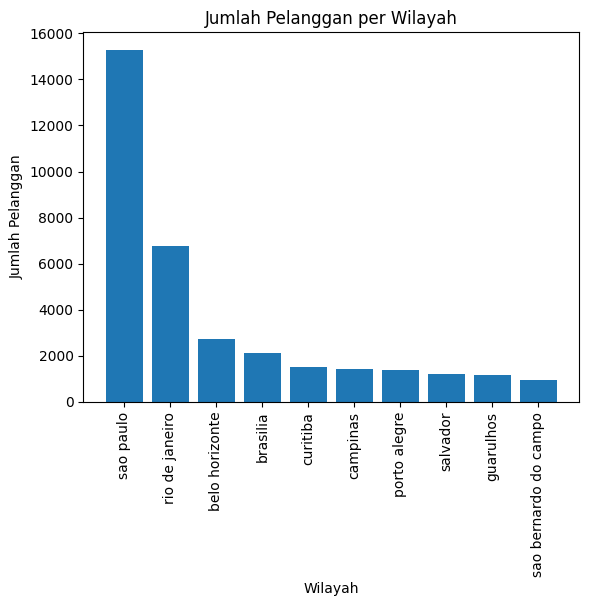

In [ ]:
#Wilayah mana yang potensial akan menghasilkan omzet baru? / Di wilayah mana toko ini ideal untuk ditempatkan?

#membuat bar chart perbandingan jumlah pelanggan per wilayah
pelanggan_per_kota_sorted = pelanggan_per_kota.sort_values(by='customer_id', ascending=False)
top_10_pelanggan = pelanggan_per_kota_sorted.head(10)
Wilayah_top_10 = top_10_pelanggan['customer_city']
jumlah_pelanggan_top_10 = top_10_pelanggan['customer_id']
plt.bar(Wilayah_top_10, jumlah_pelanggan_top_10)
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Pelanggan')
plt.title('Jumlah Pelanggan per Wilayah')
plt.xticks(rotation=90)
plt.show()


### Pertanyaan 2:

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'total_units_sold_x', 'total_units_sold_y',
       'total_units_sold'],
      dtype='object')
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d

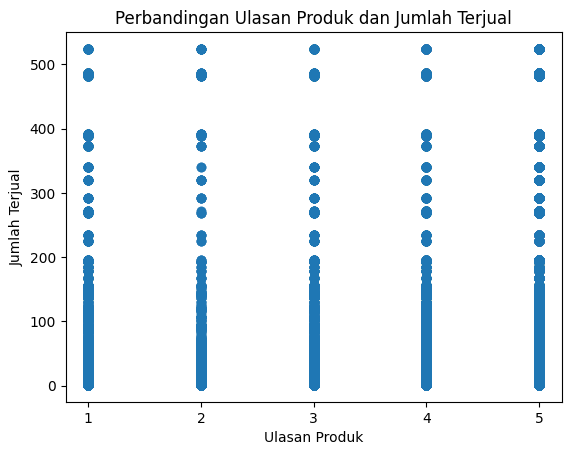

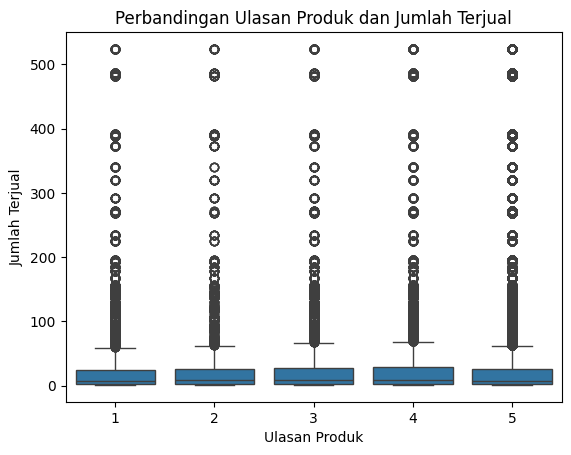

In [ ]:
#Bagaimana pengaruh ulasan pada banyaknya produk yang terjual?

#menghitung berapa jumlah produk yang terjual di setiap order
print(dataset_df.columns)
total_units_sold = dataset_df.groupby('product_id')['order_item_id'].count().reset_index()
total_units_sold.rename(columns={'order_item_id': 'total_units_sold'}, inplace=True)

print(dataset_df.head())

print(dataset_df['review_score'].unique())

#memvisualisasikan dengan scatter plot
plt.scatter(dataset_df['review_score'], dataset_df['total_units_sold'], alpha=0.6)

plt.xticks([1,2,3,4,5])
plt.xlabel('Ulasan Produk')
plt.ylabel('Jumlah Terjual')
plt.title('Perbandingan Ulasan Produk dan Jumlah Terjual')

plt.show()

#memvisualisasikan dengan boxplot
sns.boxplot(x='review_score', y='total_units_sold', data=dataset_df)
plt.xlabel('Ulasan Produk')
plt.ylabel('Jumlah Terjual')
plt.title('Perbandingan Ulasan Produk dan Jumlah Terjual')
plt.show()

**Insight:**
- jumlah produk yang terjual dibandingkan dengan ulasan semuanya tersebar merata
- tidak ada pola yang jelas antara ulasan dan penjualan. Beberapa produk tetap terjual tinggi meskipun ulasannya rendah.
- ulasan tidak menjadi tolok ukur apakah penjualan akan tinggi dan rendah jika ulasannya tinggi atau rendah.

## Analisis Lanjutan (Opsional)

## Conclusion

Pertanyaan 1: Wilayah mana yang menghasilkan omzet paling besar?
- Berdasarkan analisis data di atas, wilayah yang menghasilkan omzet paling besar adalah kota Sao Paulo yaitu sekitar 15.000. Kemudian disusul oleh kota Rio de Jeneiro dengan pelanggan sebanyak 7000 dan kota Belo Horizonte sebanyak 3000.
- Perbandingan jumlah pelanggan kota Sao Paulo dengan kota lainnya memiliki gap yang cukup jauh. Artinya produk yang dijual belum tersebar merata ke seluruh kota, atau ada faktor lain yang menyebabkan mengapa gap omzet tersebut terlalu jauh.
- Menggunakan Bar Chart untuk menentukan kota yang menghasilkan omzet terbesar sangat ideal dan informatif.


Pertanyaan 2: Bagaimana pengaruh ulasan pada banyaknya produk yang terjual?
- Dari scatter plot dan boxplot di atas disimpulkan bahwa jumlah penjualan dan review cukup tersebar merata.
- Ulasan 1 terdapat banyak penjualan, hampir sama banyaknya dengan ulasan 2,3,4, dan 5
- Ulasan tidak menjadi faktor penentu apakah produk akan laris atau tidak. Ada faktor lain yang menentukan sebuah produk akan laris dan tidak.